## 목적 : 임의의 행렬을 다루기 좋은 성질로 분해하는 행렬분해 방법 중 PCA, SVD 등을 통해 Deep Neural Network에 적용해보고자 함.

참고교재   
- "Linear Algebra", David C. Lay , Steven R. Lay , Judi J. McDonald

In [1]:
import numpy as np
import matplotlib.pyplot as plt

진행방식
1. 고유벡터와 고유값 의미   
2. 행렬을 고유벡터와 고유값으로 분해(고유분해)  
3. 고유분해 성질과 한계   
4. 임의의 행렬을 제곱하면 대칭행렬이 되며 대칭행렬에 대한 행렬분해 성질 소개
5. 임의의 행렬에 대한 분해

### Eigenvalue, Eigenvector

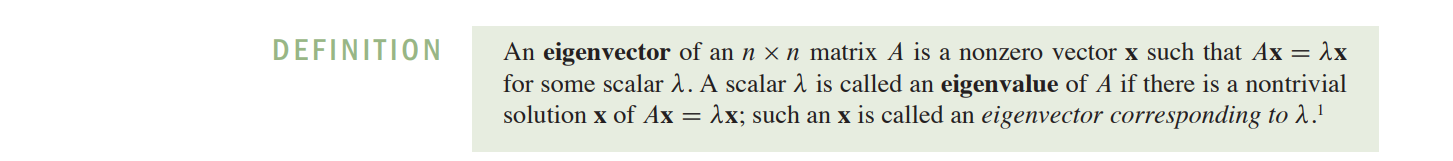

- Eigenvector는 선형변환을 통해 차원과 회전을 변환시키지 않고 크기만 변환되는 벡터를 의미함

- $A\mathbf{x}=\lambda \mathbf{x}$ : 벡터 $\mathbf{x}$에 대해 어떤 행렬 $A$에 대한 선형변환의 결과가 원래 $\mathbf{x}$의 상수배($\lambda$) 만큼만 커진 것을 의미함

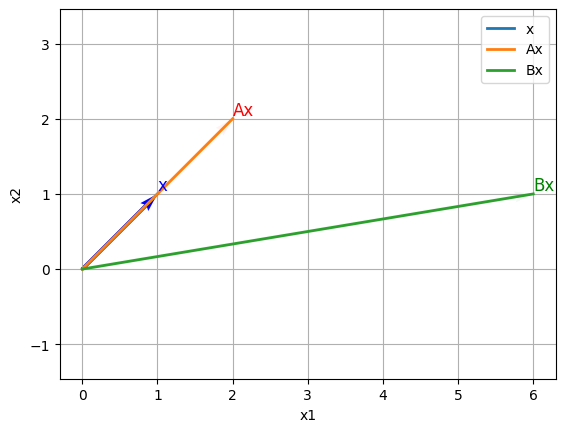

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 행렬과 벡터 정의
A = np.array([[2, 0],
              [0, 2]])
B = np.array([[1, 5],
             [3, -2]])
x = np.array([[1],
              [1]])

# 행렬 A와 벡터 x를 곱하여 결과 벡터 b 계산
b1 = np.dot(A, x)
b2 = np.dot(B, x)

# 벡터 x와 b를 그래프에 플로팅
plt.plot([0, x[0,0]], [0, x[1,0]], label='x', linewidth=2)
plt.plot([0, b1[0,0]], [0, b1[1,0]], label='Ax', linewidth=2)
plt.plot([0, b2[0,0]], [0, b2[1,0]], label='Bx', linewidth=2)

# 축 및 레이블 설정
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')

# 벡터 표시
plt.quiver(0, 0, x[0,0], x[1,0], angles='xy', scale_units='xy', scale=1, color='blue', alpha=1)
plt.quiver(0, 0, b1[0,0], b1[1,0], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.05)
plt.quiver(0, 0, b2[0,0], b2[1,0], angles='xy', scale_units='xy', scale=1, color='green', alpha=0.05)

# 벡터 라벨 표시
plt.text(x[0,0], x[1,0], 'x', fontsize=12, color='blue', verticalalignment='bottom')
plt.text(b1[0,0], b1[1,0], 'Ax', fontsize=12, color='red', verticalalignment='bottom')
plt.text(b2[0,0], b2[1,0], 'Bx', fontsize=12, color='green', verticalalignment='bottom')

# 그래프에 벡터 표시
plt.grid()
plt.legend()
plt.show()


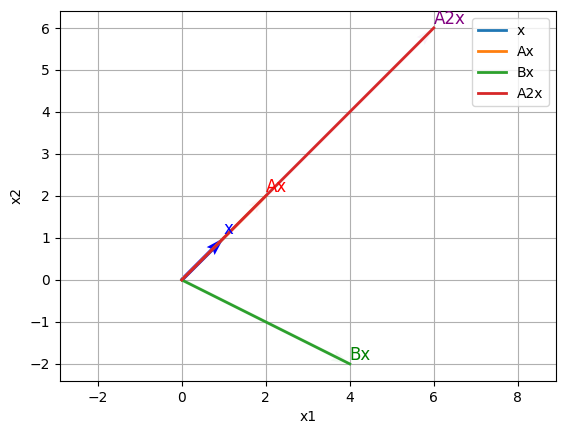

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 행렬과 벡터 정의
A = np.array([[2, 0],
              [0, 2]])
B = np.array([[1, 3],
             [0, -2]])
x = np.array([[1],
              [1]])
y = np.array([[3],
              [3]])

# 행렬 A와 벡터 x를 곱하여 결과 벡터 b 계산
b1 = np.dot(A, x)
b2 = np.dot(B, x)
b3 = np.dot(A, y)

# 벡터 x와 b를 그래프에 플로팅
plt.plot([0, x[0,0]], [0, x[1,0]], label='x', linewidth=2)
plt.plot([0, b1[0,0]], [0, b1[1,0]], label='Ax', linewidth=2)
plt.plot([0, b2[0,0]], [0, b2[1,0]], label='Bx', linewidth=2)
plt.plot([0, b3[0,0]], [0, b3[1,0]], label='A2x', linewidth=2)

# 축 및 레이블 설정
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')

# 벡터 표시
plt.quiver(0, 0, x[0,0], x[1,0], angles='xy', scale_units='xy', scale=1, color='blue', alpha=1)
plt.quiver(0, 0, b1[0,0], b1[1,0], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.05)
plt.quiver(0, 0, b2[0,0], b2[1,0], angles='xy', scale_units='xy', scale=1, color='green', alpha=0.05)
plt.quiver(0, 0, b3[0,0], b3[1,0], angles='xy', scale_units='xy', scale=1, color='purple', alpha=0.05)

# 벡터 라벨 표시
plt.text(x[0,0], x[1,0], 'x', fontsize=12, color='blue', verticalalignment='bottom')
plt.text(b1[0,0], b1[1,0], 'Ax', fontsize=12, color='red', verticalalignment='bottom')
plt.text(b2[0,0], b2[1,0], 'Bx', fontsize=12, color='green', verticalalignment='bottom')
plt.text(b3[0,0], b3[1,0], 'A2x', fontsize=12, color='purple', verticalalignment='bottom')

# 그래프에 벡터 표시
plt.grid()
plt.legend()
plt.show()


$
 \begin{pmatrix}
  2 & 0 \\
  0 & 2 \\
 \end{pmatrix}
 \begin{pmatrix}
  1 \\
  1 \\
 \end{pmatrix}= 2 \begin{pmatrix}
  1 \\
  1 \\
 \end{pmatrix}$, $
 \begin{pmatrix}
  2 & 0 \\
  0 & 2 \\
 \end{pmatrix}
 \begin{pmatrix}
  3 \\
  3 \\
 \end{pmatrix}= 2 \begin{pmatrix}
  3 \\
  3 \\
 \end{pmatrix}$   
- 어떤 행렬 $A$ 에 대응하는 eigenvalue의 eigenvector는 여러개일 수 있음.   
- 위의 예시의 경우 $\lambda=2$ 에 대응하는 eigenvector $\mathbf{x}$는 상수 x $\mathbf{x}$ 로 무한개임.

$A\mathbf{x}=\lambda\mathbf{x}$   
$A\mathbf{x}-\lambda \mathbf{x} = \lambda \mathbf{x} - \lambda \mathbf{x}$   
$(A-\lambda I)\mathbf{x}=\mathbf{0}$   

- $(A-\lambda I)\mathbf{x}=\mathbf{0}$ 을 만족하는 non-zero vector $\mathbf{x}$ 들의 집합을 Eigenspace(고유공간) 이라 함   
- non-zero vector $\mathbf{x}$ 에 대해 $(A-\lambda I)\mathbf{x}=\mathbf{0}$ 가 의미하는 다른 바는 곧, $(A-\lambda I) $ 행렬이 singular matrix 라는 것임. 즉, linearly dependent 라는 의미임.   
- singular matrix는 행렬식(determinant) 값이 0 이므로 $det(A-\lambda I)=0$ 으로 행렬 $A$에 대한 eigenvalue $\lambda$ 값을 구할 수 있고, 구해진 $\lambda$ 을 대입하여 $A\mathbf{x}=\lambda \mathbf{x}$ 을 구할 수 있음.
- $det(A-\lambda I)=0$ 을 특성방정식(Characteristic equation)이라고 함. 

$A-\lambda I=
\begin{pmatrix}
  a_{11}-\lambda & a_{12} \\
  0 & a_{22}-\lambda \\
 \end{pmatrix} $ 인 삼각행렬(triangular matrix)인 경우 $A-\lambda I$ 의 eigenvalue들은 주 대각요소(main diagonal)들의 곱이다.
 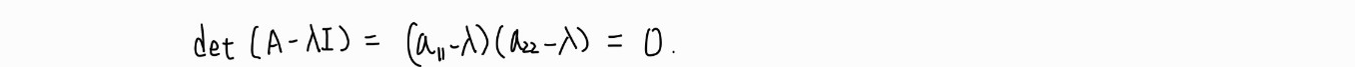

$A =
 \begin{pmatrix}
  5 & 2 & 6 & 1 \\
  0 & 3 & -8 & 0 \\
  0 & 0 &  5& 4  \\
  0 & 0 & 0 & 1
 \end{pmatrix} , det(A-\lambda I)= det
 \begin{pmatrix}
  5-\lambda & 2 & 6 & 1 \\
  0 & 3 -\lambda& -8 & 0 \\
  0 & 0 &  5-\lambda& 4  \\
  0 & 0 & 0 & 1-\lambda
 \end{pmatrix} = (5-\lambda)^{2}(3-\lambda)(1-\lambda)= 0$

그러므로 행렬 $A$에 대한 eigenvalue은 $5, 3, 1$ 임, 이때 $\lambda=5$ 가 2번 중복되는데 이를 대수적 중복도(algebraic multiplicity) 라고 함
- 이러한 성질은 나중에 행렬 $A$ 를 고유값과 고유벡터로 분해하는 Eigendecomposition 하는데 필요충분조건을 제시하는데에 필요함

- 어떤 행렬 하나에 대응하는 고유값과 고유벡터는 여러개일 수 있음.   
- 이 생각을 확장하면 어떤 행렬 $A$ 를 고유값과 고유벡터의 결합으로 표현해볼 수 있음. 다시 말해 $A$ 를 크기를 가지는 고유값과 그에 대응하는 고유벡터들로 분해하여 표현해볼 수 있다는 말임->Eigendecomposition

# 
### 이제 어떤 행렬을 고유값과 고유벡터들의 표현으로 변환해보고자 함.
$A=[\mathbf{x}_{1} \dots \mathbf{x}_{n}] $$
 \begin{pmatrix}
  \lambda_{1} & 0 & \cdots & 0 \\
  0 & \lambda_{2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & \lambda_{n}
 \end{pmatrix}$$  ([\mathbf{x}_{1} \dots \mathbf{x}_{n}])^{-1}= XDX^{-1}$ 

# 
#### Definition : Similarity
(nxn) 행렬 $A, D$에 대해 $X^{-1}AX=D $ 또는 $A=XDX^{-1}$을 만족하는 non-singular matrix $X$가 존재하면 $A$ 와 $D$는 닮았다 라고함, 그리고 $A$를 $X^{-1}AX$로 변환하는 것을 닮음 변환(Similarity transformation)이라 함.  
- 어떤 행렬 $A$ 를 다루기 좋은 성질을 가지는 행렬 $D$로 분해하기 위해 필요한 개념으로   
- Eigendecomposition은 어떤 행렬 $A$가 eigenvector들의 집합인 행렬 $X$ 와 eigenvalue들의 집합인 대각행렬 $D$ 으로 분해가되는 similarity의 special case임

$ ∴ A=XDX^{-1}$ ... Diagonalization Theorem   
(nxn) 행렬 $A$ 가 Eigendecomposition 되는 필요충분 조건은 $A$가 $n$개의 linearly independent인 eigenvector를 가지는 것이다.   
* n개의 linearly independent인 eigenvector들을 eigenvector basis 라고도 함

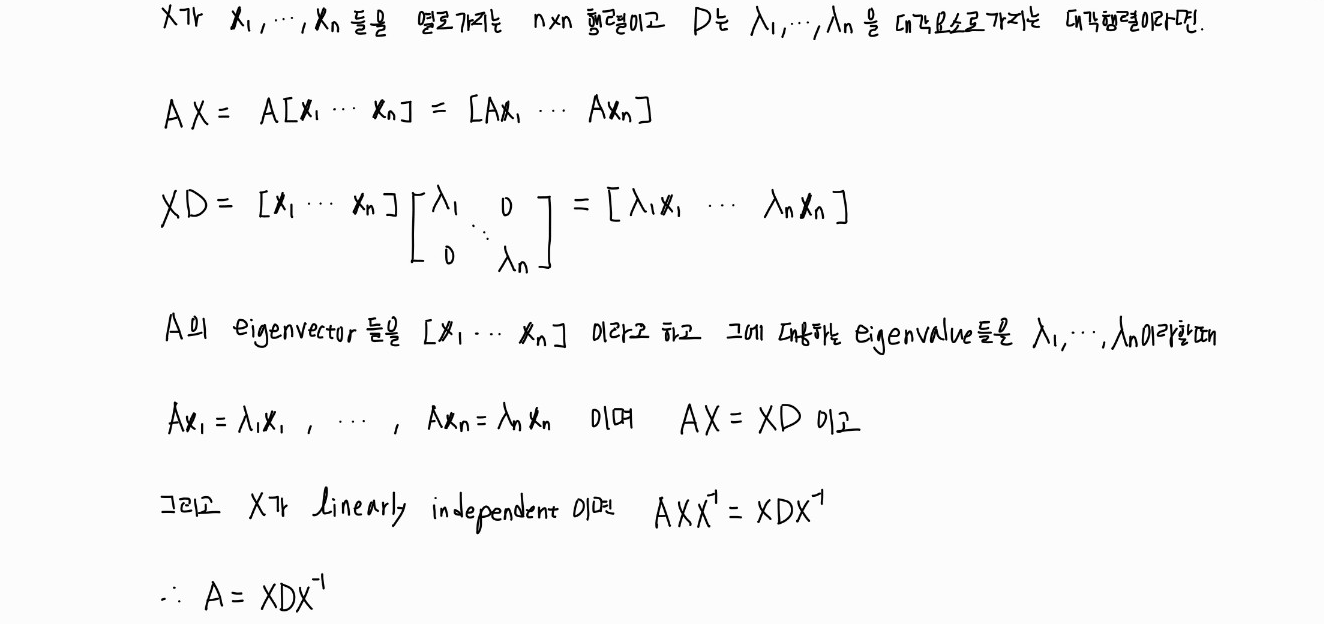

- $XD $의 성질

In [36]:
X = np.random.choice(10,(4,4))
D = np.eye(4)
for i in range(4):
    D[i][i]= np.random.choice(5, 1)
    
print(X)
print(D)

[[8 2 3 6]
 [7 3 2 8]
 [4 8 0 5]
 [6 3 1 5]]
[[3. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 1.]]


- 값이 다른 대각행렬에 대한 임의의 행렬 $X$에 대한 행렬곱에서 $XD \neq DX$ 임

In [37]:
print(np.dot(X,D))
print(np.dot(D,X))

[[24.  8. 12.  6.]
 [21. 12.  8.  8.]
 [12. 32.  0.  5.]
 [18. 12.  4.  5.]]
[[24.  6.  9. 18.]
 [28. 12.  8. 32.]
 [16. 32.  0. 20.]
 [ 6.  3.  1.  5.]]


- $XD=DX $의 성립은 $D$가 같은 상수값을 대각선으로 가질때만 가능함.

In [38]:
C = np.eye(4)
for i in range(4):
    C[i][i] = 3
print(np.dot(X,C))
print(np.dot(C,X))

[[24.  6.  9. 18.]
 [21.  9.  6. 24.]
 [12. 24.  0. 15.]
 [18.  9.  3. 15.]]
[[24.  6.  9. 18.]
 [21.  9.  6. 24.]
 [12. 24.  0. 15.]
 [18.  9.  3. 15.]]


- 하지만 $ X = [\mathbf{x}_{1} \dots \mathbf{x}_{n}]$ 그리고  $D =
 \begin{pmatrix}
  \lambda_{1} & 0 & \cdots & 0 \\
  0 & \lambda_{2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & \lambda_{n}
 \end{pmatrix}$ 의 경우 
   $XD=[\lambda_{1}\mathbf{x}_{1} \dots \lambda_{n}\mathbf{x}_{n} ]$ 이 성립함.

In [39]:
print(np.dot(X,D))

c1 = D[0][0]
c2 = D[1][1]
c3 = D[2][2]
c4 = D[3][3]

print(c1*X[:,0], c2*X[:,1], c3*X[:,2], c4*X[:,3])

[[24.  8. 12.  6.]
 [21. 12.  8.  8.]
 [12. 32.  0.  5.]
 [18. 12.  4.  5.]]
[24. 21. 12. 18.] [ 8. 12. 32. 12.] [12.  8.  0.  4.] [6. 8. 5. 5.]


- $n$개의 서로 다른 eigenvalue들을 가지는 (nxn) 행렬은 eigendecomposition 가능하다.   
- 중복된 eigenvalue들을 가지더라도 중복된 eigenvalue에 대응하는 eigenvector들이 서로 linearly independent이면 eigendecomposition 가능함.

$A =
 \begin{pmatrix}
  5& 0 & 0 & 0 \\
  0 & 5 & 0 & 0 \\
  1  & 4  & -3 & 0  \\
  -1 & -2 & 0 & -3
 \end{pmatrix}$ 에서 $A$의 eigenvalue는 5와 -3임. 하지만 아래와 같이 다른 고유벡터들을 가지므로 분해가능함

In [47]:
A = np.array([[5, 0, 0, 0],
             [0, 5, 0, 0],
             [1, 4, -3, 0],
             [-1, -2, 0 , -3]])
D,P=np.linalg.eig(A)
print("A의 고유값 : ", D)
print("A의 고유벡터 : \n", P)

P_inv = np.linalg.inv(P)
D = np.diag(D)
B = np.dot(np.dot(P,D), P_inv)
print("PDP^-1 :\n ",B)

A의 고유값 :  [-3. -3.  5.  5.]
A의 고유벡터 : 
 [[ 0.          0.          0.98473193  0.        ]
 [ 0.          0.          0.          0.87287156]
 [ 1.          0.          0.12309149  0.43643578]
 [ 0.          1.         -0.12309149 -0.21821789]]
PDP^-1 :
  [[ 5.  0.  0.  0.]
 [ 0.  5.  0.  0.]
 [ 1.  4. -3.  0.]
 [-1. -2.  0. -3.]]


#### $A=XDX^{-1}$ 성질

#### $A=XDX^{-1}$ 한계